In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [41]:
# Load the TMDB 5000 Movies dataset
movies = pd.read_csv('tmdb_5000_movies.csv')

# Display basic information about the dataset
print(movies.info())
# print(movies.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [42]:
# Handle missing values by filling with an empty string
movies['overview'] = movies['overview'].fillna('')
# print(movies['genres'])
# Convert genres from JSON to a list of strings
# ast - abstract syntax tree
import ast
movies['genres'] = movies['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)])

movies['genres'] = movies['genres'].apply(lambda x: ' '.join(x))
# print(movies['genres'])
# Combine important features for the recommendation (overview and genres)
movies['combined_features'] = movies['overview'] + ' ' + movies['genres']
print(movies['combined_features'])

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: combined_features, Length: 4803, dtype: object


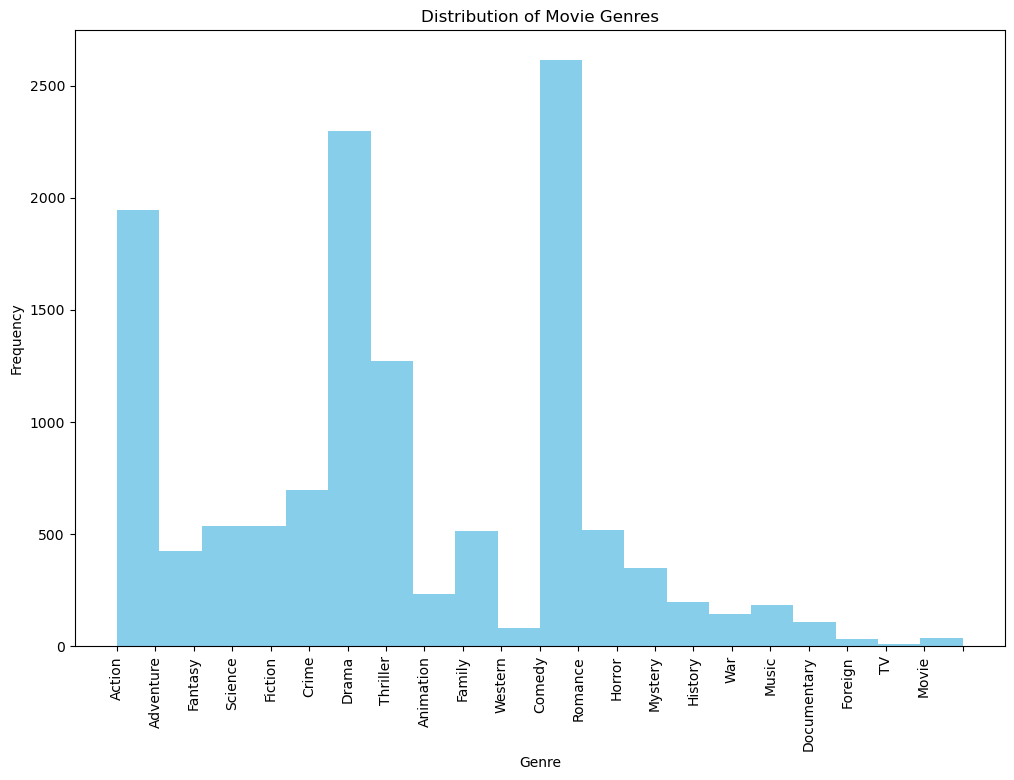

In [43]:
# Example visualization: Distribution of movie genres
movies['genres'] = movies['genres'].str.split(' ')
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
plt.figure(figsize=(12, 8))
plt.hist(all_genres, bins=20, color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [44]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Apply the vectorizer on the combined features
tfidf_matrix = tfidf.fit_transform(movies['combined_features'])
print(tfidf_matrix)

  (0, 7147)	0.11944240653866323
  (0, 16505)	0.11916708568601869
  (0, 6963)	0.12784566767911418
  (0, 602)	0.1035652647188414
  (0, 493)	0.08971093911633833
  (0, 3545)	0.2660484164500814
  (0, 795)	0.20167274822933318
  (0, 14754)	0.25698527425131296
  (0, 13355)	0.24550868729850578
  (0, 7414)	0.2084015827876331
  (0, 19054)	0.2309360211266385
  (0, 12269)	0.17209768042770615
  (0, 19671)	0.2337210823363359
  (0, 13644)	0.28303452737598744
  (0, 12411)	0.26277843072771534
  (0, 5519)	0.2696302805457782
  (0, 11667)	0.24968867216203555
  (0, 13680)	0.3301147732267923
  (0, 3232)	0.19243399296193348
  (0, 225)	0.29567953367045263
  (1, 14969)	0.2704026034453965
  (1, 18376)	0.36646488875339034
  (1, 6188)	0.2683671109526637
  (1, 19418)	0.299320232775134
  (1, 6016)	0.19231228864889158
  :	:
  (4802, 4576)	0.1491677950974323
  (4802, 5633)	0.1068084769658984
  (4802, 10126)	0.1503482843032387
  (4802, 16409)	0.170255762467694
  (4802, 4816)	0.14142405689290616
  (4802, 1311)	0.1675450

In [45]:
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)
# Create a Series for the movie titles to look up indices easily
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
indices

[[1.         0.03898534 0.0158045  ... 0.         0.         0.        ]
 [0.03898534 1.         0.01754479 ... 0.02077535 0.         0.        ]
 [0.0158045  0.01754479 1.         ... 0.01447181 0.         0.        ]
 ...
 [0.         0.02077535 0.01447181 ... 1.         0.01958252 0.00686099]
 [0.         0.         0.         ... 0.01958252 1.         0.01170891]
 [0.         0.         0.         ... 0.00686099 0.01170891 1.        ]]


title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

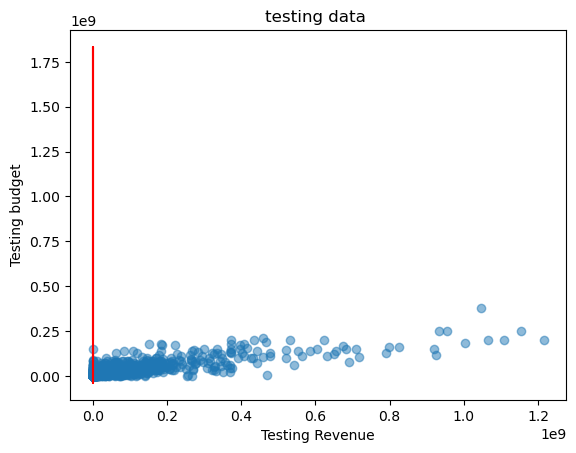

In [46]:
# Prepare data for predicting movie popularity (revenue)
features = movies[['budget', 'popularity', 'runtime']]
target = movies['revenue']

# Handle missing values
features = features.fillna(features.mean())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model

# user_budget = int(input("Enter the budget"))
# user_popular = float(input("Enter the popularity"))
# user_runtime = int(input("Enter the runtime of movie"))
# user = [[user_budget,user_popular,user_runtime]]
y_pred = model.predict(X_test)
# y_pred = model.predict(user)
# print(X_test['budget'])
# print(y_test)
# Plot the results
plt.scatter(y_test, X_test['budget'], alpha=0.5)
plt.plot(y_pred,'r')
plt.xlabel('Testing Revenue')
plt.ylabel('Testing budget')
plt.title('testing data ')
plt.show()


In [52]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]  # Get the index of the movie that matches the title
    sim_scores = list(enumerate(cosine_sim[idx]))# Get the pairwise similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort movies
    sim_scores = sim_scores[1:11]  # Get the scores of the 10 most similar movies
    movie_indices = [i[0] for i in sim_scores]  # Get the movie indices
    print(movie_indices)
    return movies['title'].iloc[movie_indices]  # Return the top 10 most similar movies

# Example: Get recommendations for a specific movie
print(get_recommendations('The American'))


[0, 1033, 1610, 3859, 943, 2767, 1895, 1049, 806, 4313]
0                           Avatar
1033                      Insomnia
1610                         Hanna
3859               Lords of London
943                       Firewall
2767                 Birthday Girl
1895              Punch-Drunk Love
1049                 Patriot Games
806     Captain Corelli's Mandolin
4313                    Below Zero
Name: title, dtype: object
